[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1OsFhHkcDuQKW6Xp4AjiZbl1qz55k_7eW?usp=sharing)

# CNN desde cero con Keras
<h4>Names:<strong> Carlos Julian Herrera, Ali Villegas, Alfredo Quintero </strong></h4>   
 <h4>Students ID: <strong>A01114097, A01337596, A01337630 </strong> </h4>    
 <h4>Github:</h4>
 <ul>
  <li> <a href="https://github.com/JulianHerreraH/Sistemas_Inteligentes">Github Julian
  </a>
  </li>
  <li>
  <a href="https://github.com/AliVillegas/Sistemas-Inteligentes">Github Ali
  </a>
  </li>
  <li>
    <a href="https://github.com/alfredoqt/sistemas-inteligentes">Github Alfredo
    </a>
  </li>
 </ul>

 
# **Importando datos**

In [ ]:
import numpy as np
from glob import glob
!mkdir dataset
!wget -O dataset/dog_dataset.zip https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip -q dataset/dog_dataset.zip 
human_files = np.array(glob("lfw/*/*"))
dog_files_test = np.array(glob("dogImages/test/*/*"))
dog_files_train = np.array(glob("dogImages/train/*/*"))
dog_files_valid = np.array(glob("dogImages/valid/*/*"))

print('There are %d total dog train images.' % len(dog_files_train))
print('There are %d total dog test images.' % len(dog_files_test))
print('There are %d total dog valid images.' % len(dog_files_valid))

--2020-11-21 20:30:44--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.24.145
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.24.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dataset/dog_dataset.zip’

dataset/dog_dataset 100%[===================>]   1.05G  41.8MB/s    in 26s     

2020-11-21 20:31:11 (40.7 MB/s) - ‘dataset/dog_dataset.zip’ saved [1132023110/1132023110]

There are 6680 total dog train images.
There are 836 total dog test images.
There are 835 total dog valid images.


# **Split de Entrenamiento, Pruebas y validación**

In [ ]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

#Carga imagenes de la carpeta
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

train_files, train_targets = load_dataset('dogImages/train/')
valid_files, valid_targets = load_dataset('dogImages/valid/')
test_files, test_targets = load_dataset('dogImages/test/')

dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]

print('Categorías de perros : %d ' % len(dog_names))
print('Imágenes totales: %s\n' % len(np.hstack([train_files, valid_files, test_files])))
print('Imágenes de Entrenamiento: %d ' % len(train_files))
print('Imágenes de Validación: %d' % len(valid_files))
print('Imágenes de prueba: %d '% len(test_files))

Categorías de perros : 133 
Imágenes totales: 8351

Imágenes de Entrenamiento: 6680 
Imágenes de Validación: 835
Imágenes de prueba: 836 


# **Preprocesamiento para keras**

In [ ]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # carga imagen RGB como PIL 
    img = image.load_img(img_path, target_size=(224, 224))
    # convertimos PIL a un tensor 3D de 224x224x3 ( es decir tamaño y color)
    x = image.img_to_array(img)
    # convertimos tensor 3D a 4D tensor de 1x224x224x3 es decir (tamaño del batch, tamaño y color)
    #esto es porque así lo demanda la cnn 
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [ ]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# Pre procesando datos. Dividimos cada pixel en 255 Para reescalar las imágenes antes de entrenar
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 836/836 [00:06<00:00, 120.44it/s]


# **Diseño CNN**

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Activation, Dense, Flatten
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization

model = Sequential() #permite crear modelos capa por capa 
#Primera capa de nuestra arquitectura 
#Estamos utilizando 16 filtros, usando pooling para reducir las dimensiones espaciales finales  y dropout para ignorar neuronas random y evitar Overfitting
model.add(Conv2D(16, (3, 3), padding='same', use_bias=False, input_shape=(224, 224, 3)))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu")) # asignamos el nombre del output en esta face 
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.2)) 

#Segunda capa de nuestra arquitectura 

#En cada capa usamos filtros que nos permiten obtener diferentes mapas de características de la imagen original 
 
#Estamos utilizando 32 filtros, usando pooling para reducir las dimensiones espaciales finales  y dropout para ignorar neuronas random y evitar Overfitting

model.add(Conv2D(32, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.2))

#Estamos utilizando 64 filtros, usando pooling para reducir las dimensiones espaciales finales  y dropout para ignorar neuronas random y evitar Overfitting

model.add(Conv2D(64, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.2))

#Estamos utilizando 128 filtros, usando pooling para reducir las dimensiones espaciales finales  y dropout para ignorar neuronas random y evitar Overfitting

model.add(Conv2D(128, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(Flatten()) # prepara los vectores para capas completamente interconectadas 
model.add(Dropout(0.2))


model.add(Dense(512, activation='relu'))
model.add(Dense(133, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      432       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 16)      48        
_________________________________________________________________
activation (Activation)      (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 32)        4608      
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 32)        9

# **PRUEBA con 10 EPOCHS**

In [ ]:
from keras.callbacks import ModelCheckpoint  

EPOCHS = 10 # tarda como 1 hora en CPU entrenar 13.5167%
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)
history = model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=EPOCHS, batch_size=32, callbacks=[checkpointer], verbose=1)

Epoch 1/10
209/209 [==============================] - ETA: 0s - loss: 4.8388 - accuracy: 0.0213
Epoch 00001: val_loss improved from inf to 5.19323, saving model to saved_models/weights.best.from_scratch.hdf5
209/209 [==============================] - 7s 32ms/step - loss: 4.8388 - accuracy: 0.0213 - val_loss: 5.1932 - val_accuracy: 0.0168
Epoch 2/10
207/209 [============================>.] - ETA: 0s - loss: 4.3486 - accuracy: 0.0485
Epoch 00002: val_loss improved from 5.19323 to 5.02467, saving model to saved_models/weights.best.from_scratch.hdf5
209/209 [==============================] - 6s 30ms/step - loss: 4.3474 - accuracy: 0.0490 - val_loss: 5.0247 - val_accuracy: 0.0228
Epoch 3/10
208/209 [============================>.] - ETA: 0s - loss: 4.0933 - accuracy: 0.0760
Epoch 00003: val_loss improved from 5.02467 to 4.73995, saving model to saved_models/weights.best.from_scratch.hdf5
209/209 [==============================] - 6s 30ms/step - loss: 4.0939 - accuracy: 0.0762 - val_loss: 4.

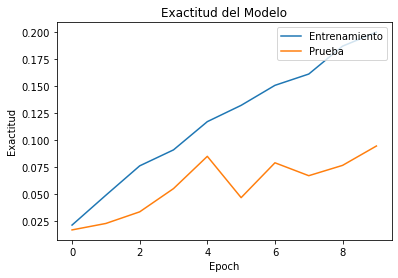

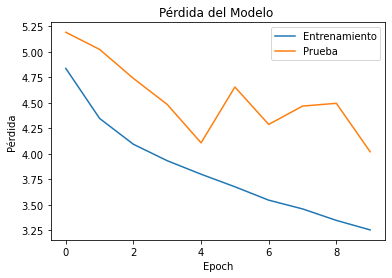

Test accuracy: 10.2871%


In [ ]:
import matplotlib.pyplot as plt                        

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud del Modelo')
plt.ylabel('Exactitud')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del Modelo ')
plt.ylabel('Pérdida')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper right')
plt.show()
# obteniendo index de la raza predecida para cada imagen de prueba 
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]
#Probando Accuracy 
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

# **PRUEBA con 15 EPOCHS**

Epoch 1/15
207/209 [============================>.] - ETA: 0s - loss: 3.1054 - accuracy: 0.2283
Epoch 00001: val_loss did not improve from 4.02050
209/209 [==============================] - 6s 31ms/step - loss: 3.1063 - accuracy: 0.2286 - val_loss: 4.2703 - val_accuracy: 0.0970
Epoch 2/15
208/209 [============================>.] - ETA: 0s - loss: 3.0401 - accuracy: 0.2404
Epoch 00002: val_loss did not improve from 4.02050
209/209 [==============================] - 6s 31ms/step - loss: 3.0395 - accuracy: 0.2401 - val_loss: 4.6337 - val_accuracy: 0.0754
Epoch 3/15
208/209 [============================>.] - ETA: 0s - loss: 2.9366 - accuracy: 0.2506
Epoch 00003: val_loss did not improve from 4.02050
209/209 [==============================] - 6s 30ms/step - loss: 2.9395 - accuracy: 0.2500 - val_loss: 4.9225 - val_accuracy: 0.0695
Epoch 4/15
209/209 [==============================] - ETA: 0s - loss: 2.8324 - accuracy: 0.2840
Epoch 00004: val_loss did not improve from 4.02050
209/209 [=======

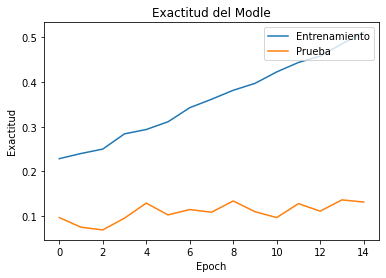

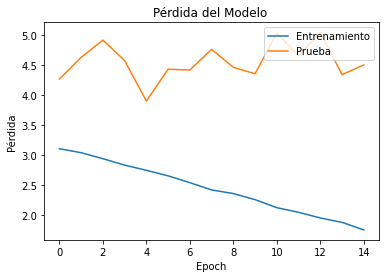

Test accuracy: 13.7560%


In [ ]:
EPOCHS = 15
history = model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=EPOCHS, batch_size=32, callbacks=[checkpointer], verbose=1)
import matplotlib.pyplot as plt                        
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud del Modle')
plt.ylabel('Exactitud')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del Modelo ')
plt.ylabel('Pérdida')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper right')
plt.show()
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

# **PRUEBA con 30 EPOCHS**


Epoch 1/30
209/209 [==============================] - ETA: 0s - loss: 1.6892 - accuracy: 0.5234
Epoch 00001: val_loss did not improve from 3.90356
209/209 [==============================] - 6s 31ms/step - loss: 1.6892 - accuracy: 0.5234 - val_loss: 4.7910 - val_accuracy: 0.1126
Epoch 2/30
208/209 [============================>.] - ETA: 0s - loss: 1.5742 - accuracy: 0.5571
Epoch 00002: val_loss did not improve from 3.90356
209/209 [==============================] - 6s 30ms/step - loss: 1.5730 - accuracy: 0.5572 - val_loss: 4.6539 - val_accuracy: 0.1305
Epoch 3/30
209/209 [==============================] - ETA: 0s - loss: 1.4910 - accuracy: 0.5746
Epoch 00003: val_loss did not improve from 3.90356
209/209 [==============================] - 6s 30ms/step - loss: 1.4910 - accuracy: 0.5746 - val_loss: 4.7649 - val_accuracy: 0.1317
Epoch 4/30
209/209 [==============================] - ETA: 0s - loss: 1.3944 - accuracy: 0.5901
Epoch 00004: val_loss did not improve from 3.90356
209/209 [=======

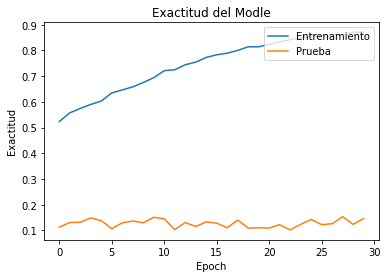

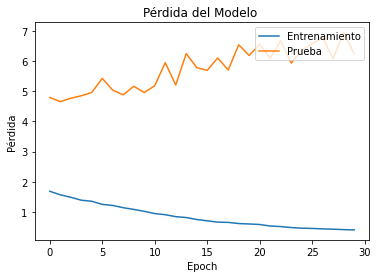

Test accuracy: 14.1148%


In [ ]:
EPOCHS = 30
history = model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=EPOCHS, batch_size=32, callbacks=[checkpointer], verbose=1)
import matplotlib.pyplot as plt                        
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud del Modle')
plt.ylabel('Exactitud')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del Modelo ')
plt.ylabel('Pérdida')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper right')
plt.show()
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

# **PRUEBA con 300 EPOCHS**

Epoch 1/300
207/209 [============================>.] - ETA: 0s - loss: 0.2263 - accuracy: 0.9296
Epoch 00001: val_loss did not improve from 3.92070
209/209 [==============================] - 6s 31ms/step - loss: 0.2257 - accuracy: 0.9296 - val_loss: 7.8335 - val_accuracy: 0.1305
Epoch 2/300
209/209 [==============================] - ETA: 0s - loss: 0.2184 - accuracy: 0.9328
Epoch 00002: val_loss did not improve from 3.92070
209/209 [==============================] - 6s 30ms/step - loss: 0.2184 - accuracy: 0.9328 - val_loss: 7.6079 - val_accuracy: 0.1293
Epoch 3/300
207/209 [============================>.] - ETA: 0s - loss: 0.2203 - accuracy: 0.9325
Epoch 00003: val_loss did not improve from 3.92070
209/209 [==============================] - 6s 30ms/step - loss: 0.2208 - accuracy: 0.9325 - val_loss: 8.1689 - val_accuracy: 0.1365
Epoch 4/300
207/209 [============================>.] - ETA: 0s - loss: 0.2005 - accuracy: 0.9384
Epoch 00004: val_loss did not improve from 3.92070
209/209 [===

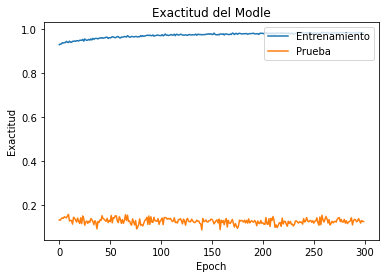

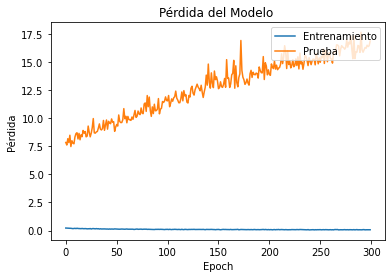

Test accuracy: 12.4402%


In [ ]:
EPOCHS = 300
history = model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=EPOCHS, batch_size=32, callbacks=[checkpointer], verbose=1)
import matplotlib.pyplot as plt                        
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud del Modle')
plt.ylabel('Exactitud')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del Modelo ')
plt.ylabel('Pérdida')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper right')
plt.show()
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)
